In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import math as math

In [2]:
#task 1
def func(x):
    return pow((1+25*pow(x,2)), -1) 

In [28]:
def get_c_k(x, x_0, n):
    c_k = np.array([1.0]) 
    div = 1.0
    for k in range(len(x)):
    
        if(n == k):
            continue
        c_k = np.polymul(c_k, np.array([1.0, -x[k]]))
        div *= x_0 - x[k]

    c_k = c_k/div 
    return c_k

In [29]:
def lagrange( a, b, n):
    result = np.array([0.0])
    t = [a + ((b - a) / (n - 1)) * i for i in range(n)]
    y = [func(x) for x in t]
    
    for i in range(len(t)):
       result = np.polyadd(result, get_c_k(t, t[i], i) * y[i])
    f = np.polyval(result, t)
  
    temp_t = [a + ((b - a) / 1000) * i for i in range(0, 1001)]
    temp_x = np.polyval(result, temp_t)

    name = "Lagrange interpolation for n = " + str(n)
    plt.plot(temp_t, temp_x, label = name)

    return result

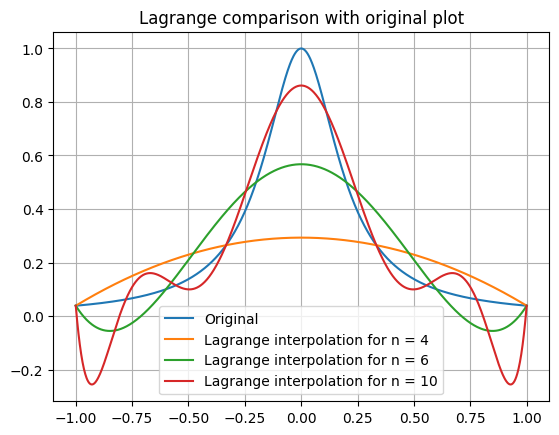

In [30]:
plt.figure()
plt.title("Lagrange comparison with original plot")
temp_t = [i / 500 for i in range(-500, 501)]
temp_x = [func(temp_t[i]) for i in range(len(temp_t))]
plt.plot(temp_t, temp_x, label="Original")

lagrange(-1, 1, 4)
lagrange(-1, 1, 6)
lagrange(-1, 1, 10)

plt.grid()
plt.legend()
plt.show()

In [31]:
 def newton_get_deffer(x, y):
    n = x.size
     
    if n == 1:
        return ys[0]
    elif n == 2:
        x1, x2 = x
        y1, y2 = y
        return (y2 - y1) / (x2 - x1)

    x0 = x[0]
    xn = x[-1]
    return (newton_diff_order_n(x[1:], y[1:]) - newton_diff_order_n(x[0:-1], y[0:-1])) / (xn - x0)

In [32]:
def Newton_method(a, b, n):

    t = [(a + b) / 2 + ((b - a) / 2) * np.cos(np.pi * (2 * k - 1) / (2 * n)) for k in range(1, n+1)]
    x = [func(xk) for xk in t]

    N = np.poly1d([x[0]])

    temp_poly = np.poly1d([1])

    for i in range(len(t) - 1):

        l = len(x)
        temp = []
        for(j) in range(l - 1):
            temp.append((x[j + 1] - x[j]) / (t[j + 1 + i] - t[j]))

        temp_poly = np.polymul(temp_poly, np.poly1d([1, -t[i]]))
        N = np.polyadd(N, temp[0] * temp_poly)

        x = temp

    #print(N)
    f = lambda x: np.polyval(N, x)

    
    temp_t = [a + ((b - a) / 1000) * i for i in range(0, 1001)]
    temp_x = np.polyval(N, temp_t)

    name = "Newton+Chebyshev interpolation for n = " + str(n)
    plt.plot(temp_t, temp_x, label = name)

In [33]:
def chebyshev_zeros(a, b, k, n):
    return ((a + b) / 2) + ((b - a) / 2) * math.cos((2 * k - 1) * np.pi / (2 * n))

In [8]:
def newton(a, b, size):
    t = [(a + b) / 2 + ((b - a) / 2) * np.cos(np.pi * (2 * k - 1) / (2 * size)) for k in range(1, size+1)]
    x = [func(xk) for xk in t]
    
    current_poly = np.array([1.0])
    result_poly = np.array([0.0])

    for n, x in enumerate(x):
        result_poly = np.polyadd(result_poly, newton_get_deffer(x[0:n + 1], ys[0:n + 1]) * current_poly)
        multiple_poly = np.array([1.0, -x])
        current_poly = np.polymul(current_poly, multiple_poly)
    
    return result_poly

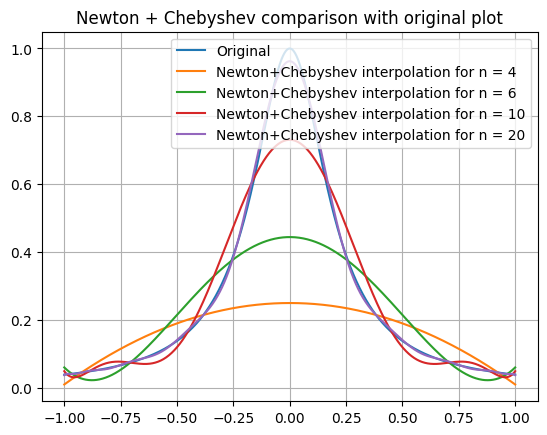

In [9]:
plt.figure()
plt.title("Newton + Chebyshev comparison with original plot")
temp_t = [i / 500 for i in range(-500, 501)]
temp_x = [func(temp_t[i]) for i in range(len(temp_t))]
plt.plot(temp_t, temp_x, label="Original")

Newton_method(-1, 1, 4)
Newton_method(-1, 1, 6)
Newton_method(-1, 1, 10)
Newton_method(-1, 1, 20)

plt.grid()
plt.legend()
plt.show()

In [ ]:
a1 = -1.0
b1 = 1.0
fig, ax = plt.subplots(1, 1, figsize=(11.7, 8.3))
xs = np.linspace(a1, b1, 1000)

plot_function(ax, xs, np.vectorize(f_1)(xs))

ns = [4, 6, 10]
for n in ns:
    points = get_interpolation_points_chebyshev(n)
    coeff = newton_interpolation(points, np.vectorize(f_1)(points))
    plot_interpolation_poly(ax, points, coeff)

ax.set_title("Рис. 2. Интерполяция в форме Ньютона с узлами в нулях полиномах Чебышева")
fig.savefig("output/task1-newton.pdf", transparent=False, bbox_inches="tight")

In [41]:
#task2 
def func_2(x):
    return math.log(100 - x) / (10 - np.sqrt(x))

In [42]:
from sympy import *
import math as math

In [61]:
def getLejanDerr(x, n):
    return n * (getLejanPol(x, n - 1) - x * getLejanPol(x, n)) / (1 - x * x)

In [62]:
def getLejanPol(x, n) -> float:
    if (n == 0):
        return 1
    if (n == 1):
        return x
    return (2.0 * n + 1) * x * getLejanPol(x, n - 1) / (n + 1) - n * getLejanPol(x, n - 2) / (n + 1)

In [63]:
def change_vars(a, b, x):
    sum_1 = (a + b) / 2.0
    sum_2 = (b - a) / 2.0
    x_new = [sum_1 + sum_2 * T for T in Vars]
    return x_new

In [64]:
def getNextNewtonIteration(Xk, P, P1):
    return Xk - P / P1

In [77]:
def getLejanZeros(N : int) -> list:
    #X0 = cos(pi(4i - 1)/(4N + 2))
    Zeros = []
    Epsilon = 1e-3
    for i in range(1, N + 1):
        Xk = math.cos(math.pi * (4 * i - 1) / (4 * N + 2))
        Xk1 = getNextNewtonIteration(Xk, get_c_k(Xk, Xk[i], N), getLejanDerr(Xk, N))
        while (abs(Xk - Xk1) > Epsilon):
            Xk = Xk1
            Xk1 = getNextNewtonIteration(Xk, getLejanPol(Xk, N), getLejanDerr(Xk, N))
        Zeros.append(Xk1)
    return Zeros

In [78]:
def calculateSimpsonByPoints(Functions : list, a : float, b : float) -> float:
    # Считает интеграл от поточечно заданной функции со значениями Functions[i] на отрезке [a, b] методом Симпсона
    Int = 0
    N = len(Functions)
    k = int(N / 2)
    h = (b - a) / N
    for i in range(1, k):
        F1 = Functions[2*i]
        F2 = Functions[2*i - 1]
        F3 = Functions[2*i - 2]
        Int += h / 3.0 * (F1 + 4 * F2 + F3)
    return Int

In [79]:
def calculateWithGaussQuadrature(func, a, b, n):
    Int = 0
    t_k = getLejanZeros(n)
    x_k = changeVars(a + 1e-1, b, t_k)
    for k in range(1, N + 1):
        # Интегрирование методом Симпсона по 1000 точкам
        Args = np.arange(a, b, 0.001)
        BaseLagranValues = [get_c_k(NodesX, NodesX[i], k - 1) for i in Args]
        Ck = calculateSimpsonByPoints(BaseLagranValues, a, b)
        Fk = F(NodesX[k - 1])
        Int += Ck * Fk
    return Int

In [4]:
StartSegment = 0
EndSegment = 10
ArrayN = np.arange(2, 10)
Errors =[]
 
Exact = scipy.integrate.quad(func_2, StartSegment, EndSegment)
print("Точное решение и его ошибка (I, delta I) =", Exact)
for N in ArrayN:
        Gauss = calculateWithGaussQuadrature(func_2, StartSegment, EndSegment, N)
        print("\nМетод квадратур Гаусса при N =", N, ": I =", format(Gauss, '.10f'))
        Errors.append(abs(Gauss - Exact[0]) * 100 / Exact[0])
plt.figure(figsize = (10, 10))
plt.title("Кривая зависимости относительной ошибки интегрирования от количества узлов,\n интерполированная полиномом Лагранжа:)")
plt.scatter(ArrayN, Errors, marker = '^', color = 'r')
Args = np.arange(min(ArrayN), max(ArrayN), 0.01)
NewtonVals = getLagrangeValues(Args, ArrayN, Errors)
plt.plot(Args, NewtonVals, color = 'g')
plt.xlabel('Количество узлов n')
plt.ylabel('Ошибка, %')
plt.grid()
plt.savefig("Gauss.png")
plt.show()

NameError: name 'func_2' is not defined

In [14]:
#task3
def g(X):
    return 1

In [15]:
def f(X):
    return math.cos(X * math.pi)

In [16]:
def K(X, S):
    return 0.2 / (0.04 + (X - S)**2)

In [17]:
def LU(A):
    n = int(np.sqrt(np.size(A)))

    L = np.full((n, n), 0)
    U = A

    for i in range(0, n):
        for j in range(i, n):
            L[j][i] = U[j][i]/U[i][i]
    
    for k in range(1, n):
        for i in range(k - 1, n):
            for j in range(i, n):
                L[j][i] = U[j][i]/U[i][i]

        for i in range(k, n):
            for j in range(k - 1, n):
                U[i][j] = U[i][j]-L[i][k-1]*U[k-1][j]

In [18]:
def reverse_matrix(A):
    return np.linalg.inv(A)

In [19]:
def solve_system(M, F):
    L, U = LU(M)

    rL = reverse_matrix(L)
    rU = reverse_matrix(U)

    y = rL.dot(F)
    x = rU.dot(y)
    
    return x

In [20]:
def simpson_method(f, x : list):
    h = (x[len(x) - 1] - x[0]) / (len(x) - 1)
    sum = 0
    i = 0
    while(2 * i + 2 <= (len(x) - 1)):
        sum += (h / 3) * (f(x[2 * i]) + 4 * f(x[2 * i + 1]) + f(x[2 * i + 2]))
        i += 1
    return sum

In [21]:
def lagrange_koef(t, i, n):

    numerator = np.poly1d([1])
    denominator = 1
    for j in range(n):
        if(j != i):
            numerator = np.polymul(numerator, [1, -t[j]])
            denominator = denominator * (t[i] - t[j])
    L_i = numerator / denominator

    return L_i

In [22]:
def Lagrange_method(t, y):
    # t = [a + ((b - a) / (n - 1)) * i for i in range(n)]
    # #print(t)
    # y = [func(x) for x in t]


    L = np.poly1d([0])

    for i in range(len(t)):
        numerator = np.poly1d([1])
        denominator = 1
        for j in range(len(t)):
            if(j != i):
                numerator = np.polymul(numerator, [1, -t[j]])
                denominator = denominator * (t[i] - t[j])
        L_i = (numerator / denominator) * y[i]

        L = np.polyadd(L, L_i)


    #print(L)

    temp_t = [t[0] + ((t[len(t) - 1] - t[0]) / 1000) * i for i in range(0, 1001)]
    temp_x = np.polyval(L, temp_t)

    plt.plot(temp_t, temp_x)

    f = lambda x: np.polyval(L, x)
    return f

In [27]:

    n = int(input())
    a = -1
    b = 1
    Lambda = -1
    arr_x0 = [1.1, 1.25, 1.5]

    x = [a + i * (b - a) / (n - 1) for i in range(n)]
    
    h = (b - a) / (n - 1)
    
    k = int((max(arr_x0) - b) / h) + 1

    x += [b + i * h for i in range(1, k + 1)]
    
    arr_L_i = [get_c_k(x, x[i], i) for i in range(0, n)] 
    print(arr_L_i)
    arr_weights = []
    for i in range(n):
        temp_f = lambda x: np.polyval(arr_L_i[i], x)
        arr_weights.append(simpson_method(temp_f, [a + i * (b - a)/ (1000 - 1) for i in range(1000)]))
    print(arr_weights)

    Matrix = np.zeros(shape = (n + k, n + k))
    for i in range(n + k):
        for j in range(n + k):
            if (j < n):
                Matrix[i, j] = -Lambda * arr_weights[j] * K(x[i], x[j])

    for i in range(n + k):
        Matrix[i][i] += g(x[i])

    F = np.zeros(shape = (n + k, 1))
    for i in range(n + k):
        F[i, 0] = f(x[i])
    u = []
    u = solve_system(Matrix, F)

    print(x)
    print(u)

    plt.figure()
    temp_f = Lagrange_method(x, u)
    print("f(1.1) = ", temp_f(1.1))
    print("f(1.25) = ", temp_f(1.25))
    print("f(1.5) = ", temp_f(1.5))
    plt.grid()
    plt.show()

 2


[array([ 0.125, -0.5  ,  0.375]), array([-0.25,  0.5 ,  0.75])]
[0.8333328319974965, 1.3313313320000026]


TypeError: cannot unpack non-iterable NoneType object

In [11]:
main

<function __main__.main()>